## 4.10 Coding Etiquette & Excel Reporting

### 1. Import libraries and data sets

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path

path = r'/Users/katiedallarosa/Desktop/04-2024 Instacart Basket Analysis_KDallaRosa'

In [7]:
# Import and identify dataframe

df_instacart = pd.read_pickle(r'/Users/katiedallarosa/Desktop/04-2024 Instacart Basket Analysis_KDallaRosa/02 Data/Prepared Data/cust_ords_prods_merged.pkl')

In [8]:
# Check df

df_instacart.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

  order_id customer_id  order_number  orders_day_of_week  order_hour_of_day  \
0  3139998         138            28                   6                 11   
1  1977647         138            30                   6                 17   
2  3160996         138             1                   5                 13   
3  2254091         138            10                   5                 14   
4   505689         138             9                   6                 12   

   ...  first_name  surname  gender      state age date_joined n_dependants  \
0  ...     Charles      Cox    Male  Minnesota  81    8/1/2019            1   
1  ...     Charles      Cox    Male  Minnesota  81    8/1/2019            1   
2  ...     Charles      Cox    Male  Minnesota  81    8/1/2019            1   
3  ...     Charles      Cox    Male  Minnesota  81    8/1/2019            1   
4  ...     Charles      Cox    Male  Minnesota  81    8/1/2019            1   

  marital_status  income _merge  
0        married   49620   both  
1        married   49620   both  
2        married   49620   both  
3        married   49620   both  
4        married   49620   both  

[5 rows x 34 columns]

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [9]:
# Remove first & last name columns from df

df_instacart = df_instacart.drop(columns = ['first_name', 'surname'])

In [10]:
# Check to ensure columns were removed

df_instacart.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

  order_id customer_id  order_number  orders_day_of_week  order_hour_of_day  \
0  3139998         138            28                   6                 11   
1  1977647         138            30                   6                 17   
2  3160996         138             1                   5                 13   
3  2254091         138            10                   5                 14   
4   505689         138             9                   6                 12   

   ...  median_days_between_orders    order_frequency  gender      state age  \
0  ...                         8.0  Frequent customer    Male  Minnesota  81   
1  ...                         8.0  Frequent customer    Male  Minnesota  81   
2  ...                         8.0  Frequent customer    Male  Minnesota  81   
3  ...                         8.0  Frequent customer    Male  Minnesota  81   
4  ...                         8.0  Frequent customer    Male  Minnesota  81   

  date_joined n_dependants marital_status  income _merge  
0    8/1/2019            1        married   49620   both  
1    8/1/2019            1        married   49620   both  
2    8/1/2019            1        married   49620   both  
3    8/1/2019            1        married   49620   both  
4    8/1/2019            1        married   49620   both  

[5 rows x 32 columns]

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

In [11]:
# Create regional segmentation columns

result = []

for state in df_instacart['state']:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    else:
        result.append('West')

In [12]:
# Create column for region

df_instacart['region'] = result

In [14]:
# Check to ensure all columns have a value

df_instacart['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [18]:
# Display all column headers

pd.options.display.max_columns = None

In [19]:
# Check df for new column

df_instacart.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

  order_id customer_id  order_number  orders_day_of_week  order_hour_of_day  \
0  3139998         138            28                   6                 11   
1  1977647         138            30                   6                 17   
2  3160996         138             1                   5                 13   
3  2254091         138            10                   5                 14   
4   505689         138             9                   6                 12   

   days_since_prior_order  first_order  add_to_cart_order  reordered  \
0                     3.0        False                  5          0   
1                    20.0        False                  1          1   
2                     NaN         True                  4          0   
3                     6.0        False                  1          1   
4                     7.0        False                  5          0   

      price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0   Mid-range product  Regularly busy  Regularly busy           Most orders   
1   Mid-range product  Regularly busy  Regularly busy        Average orders   
2  High-range product  Regularly busy  Regularly busy           Most orders   
3  High-range product  Regularly busy  Regularly busy           Most orders   
4   Mid-range product  Regularly busy  Regularly busy           Most orders   

   max_order      loyalty_flag  mean_prod_price spending_flag  \
0         32  Regular customer         6.935811   Low spender   
1         32  Regular customer         6.935811   Low spender   
2         32  Regular customer         6.935811   Low spender   
3         32  Regular customer         6.935811   Low spender   
4         32  Regular customer         6.935811   Low spender   

   median_days_between_orders    order_frequency gender      state  age  \
0                         8.0  Frequent customer   Male  Minnesota   81   
1                         8.0  Frequent customer   Male  Minnesota   81   
2                         8.0  Frequent customer   Male  Minnesota   81   
3                         8.0  Frequent customer   Male  Minnesota   81   
4                         8.0  Frequent customer   Male  Minnesota   81   

  date_joined  n_dependants marital_status  income _merge   region  
0    8/1/2019             1        married   49620   both  Midwest  
1    8/1/2019             1        married   49620   both  Midwest  
2    8/1/2019             1        married   49620   both  Midwest  
3    8/1/2019             1        married   49620   both  Midwest  
4    8/1/2019             1        married   49620   both  Midwest

In [20]:
# Determine if there's a difference in spending habits between the regions

crosstab = pd.crosstab(df_instacart['spending_flag'], df_instacart['region'], dropna = False)

In [21]:
crosstab.to_clipboard()

spending_flag	Midwest	  Northeast	   South	 West
High spender	155975	  108225	   209691	 160354
Low spender	    7441350	  5614511	   10582194  8132559

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [25]:
# Create a low activity flag

df_instacart.loc[(df_instacart['max_order'] < 5), 'activity_flag'] = 'Low activity'

In [26]:
# Create a regular activity flag

df_instacart.loc[(df_instacart['max_order'] >= 5), 'activity_flag'] = 'Regular activity'

In [27]:
# Check value counts for activity flags

df_instacart['activity_flag'].value_counts(dropna = False)

activity_flag
Regular activity    30964564
Low activity         1440295
Name: count, dtype: int64

In [28]:
# Create exclusion from df

df_exclusion = df_instacart[df_instacart['activity_flag'].isin(['Regular activity'])]

In [29]:
# Check value counts for activity flags

df_exclusion['activity_flag'].value_counts(dropna = False)

activity_flag
Regular activity    30964564
Name: count, dtype: int64

In [30]:
df_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_low_cust.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [33]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
# Check df details for profiling details

df_exclusion[['age', 'income', 'department_id', 'n_dependants']].describe()

age      income  department_id  n_dependants
count 30964564.00 30964564.00    30964564.00   30964564.00
mean        49.47    99675.87           9.92          1.50
std         18.49    43141.87           6.28          1.12
min         18.00    25903.00           1.00          0.00
25%         33.00    67292.00           4.00          1.00
50%         49.00    96765.00           9.00          2.00
75%         65.00   128102.00          16.00          3.00
max         81.00   593901.00          21.00          3.00

In [35]:
# Create income brackets

income = []

for value in df_exclusion['income']:
    if value < 75000:
        income.append('Low income')
    elif value in range(75000, 150000):
        income.append('Medium income')
    else:
        income.append('High income')

In [36]:
# Create income brackets column

df_exclusion['income_bracket'] = income

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_29374/3198705733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion['income_bracket'] = income


In [37]:
# Check values for income_bracket

df_exclusion['income_bracket'].value_counts(dropna = False)

income_bracket
Medium income    17162609
Low income        9906680
High income       3895275
Name: count, dtype: int64

In [38]:
# Create parental status list

result = []

for value in df_exclusion['n_dependants']:
    if value == 0:
        result.append('No dependants')
    else:
        result.append('Has dependants')

In [39]:
# Create parental status column

df_exclusion['parental_status'] = result

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_29374/1234939510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion['parental_status'] = result


In [40]:
# Check data for parental_status column

df_exclusion.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19    5.80   
1           1  Chocolate Sandwich Cookies        61             19    5.80   
2         907        Premium Sliced Bacon       106             12   20.00   
3         907        Premium Sliced Bacon       106             12   20.00   
4        1000                    Apricots        18             10   12.90   

  order_id customer_id  order_number  orders_day_of_week  order_hour_of_day  \
0  3139998         138            28                   6                 11   
1  1977647         138            30                   6                 17   
2  3160996         138             1                   5                 13   
3  2254091         138            10                   5                 14   
4   505689         138             9                   6                 12   

   days_since_prior_order  first_order  add_to_cart_order  reordered  \
0                    3.00        False                  5          0   
1                   20.00        False                  1          1   
2                     NaN         True                  4          0   
3                    6.00        False                  1          1   
4                    7.00        False                  5          0   

      price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0   Mid-range product  Regularly busy  Regularly busy           Most orders   
1   Mid-range product  Regularly busy  Regularly busy        Average orders   
2  High-range product  Regularly busy  Regularly busy           Most orders   
3  High-range product  Regularly busy  Regularly busy           Most orders   
4   Mid-range product  Regularly busy  Regularly busy           Most orders   

   max_order      loyalty_flag  mean_prod_price spending_flag  \
0         32  Regular customer             6.94   Low spender   
1         32  Regular customer             6.94   Low spender   
2         32  Regular customer             6.94   Low spender   
3         32  Regular customer             6.94   Low spender   
4         32  Regular customer             6.94   Low spender   

   median_days_between_orders    order_frequency gender      state  age  \
0                        8.00  Frequent customer   Male  Minnesota   81   
1                        8.00  Frequent customer   Male  Minnesota   81   
2                        8.00  Frequent customer   Male  Minnesota   81   
3                        8.00  Frequent customer   Male  Minnesota   81   
4                        8.00  Frequent customer   Male  Minnesota   81   

  date_joined  n_dependants marital_status  income _merge   region  \
0    8/1/2019             1        married   49620   both  Midwest   
1    8/1/2019             1        married   49620   both  Midwest   
2    8/1/2019             1        married   49620   both  Midwest   
3    8/1/2019             1        married   49620   both  Midwest   
4    8/1/2019             1        married   49620   both  Midwest   

      activity_flag income_bracket parental_status  
0  Regular activity     Low income  Has dependants  
1  Regular activity     Low income  Has dependants  
2  Regular activity     Low income  Has dependants  
3  Regular activity     Low income  Has dependants  
4  Regular activity     Low income  Has dependants

In [43]:
# Create age categories

df_exclusion.loc[df_exclusion['age'] < 40, 'age_group'] = 'Young adult'
df_exclusion.loc[(df_exclusion['age'] >= 40) & (df_exclusion['age'] < 65), 'age_group'] = 'Middle aged'
df_exclusion.loc[df_exclusion['age'] >= 65, 'age_group'] = 'Senior citizen'

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_29374/1807509959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['age'] < 40, 'age_group'] = 'Young adult'


In [44]:
# Check value counts for age categories

df_exclusion['age_group'].value_counts(dropna = False)

age_group
Middle aged       12103910
Young adult       10665110
Senior citizen     8195544
Name: count, dtype: int64

In [49]:
# Create single young adult flag

df_exclusion.loc[(df_exclusion['age_group'] == 'Young adult') & (df_exclusion['parental_status'] == 'No dependants'), 'customer_profile'] = 'Single young adult'

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_29374/3876846156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[(df_exclusion['age_group'] == 'Young adult') & (df_exclusion['parental_status'] == 'No dependants'), 'customer_profile'] = 'Single young adult'


In [50]:
# Create young adult parent flag

df_exclusion.loc[(df_exclusion['age_group'] == 'Young adult') & (df_exclusion['parental_status'] == 'Has dependants'), 'customer_profile'] = 'Young adult parent'

In [51]:
# Create single middle-aged adult flag

df_exclusion.loc[(df_exclusion['age_group'] == 'Middle aged') & (df_exclusion['parental_status'] == 'No dependants'), 'customer_profile'] = 'Single middle-aged adult'

In [57]:
# Create middle-aged parent flag

df_exclusion.loc[(df_exclusion['age_group'] == 'Middle aged') & (df_exclusion['parental_status'] == 'Has dependants'), 'customer_profile'] = 'Middle-aged parent'

In [53]:
# Create single senior citizen flag

df_exclusion.loc[(df_exclusion['age_group'] == 'Senior citizen') & (df_exclusion['parental_status'] == 'No dependants'), 'customer_profile'] = 'Single senior citizen'

In [56]:
# Create senior citizen parent flag

df_exclusion.loc[(df_exclusion['age_group'] == 'Senior citizen') & (df_exclusion['parental_status'] == 'Has dependants'), 'customer_profile'] = 'Senior citizen parent'

In [58]:
# Check value counts for new customer profiles

df_exclusion['customer_profile'].value_counts()

customer_profile
Middle-aged parent          9046762
Young adult parent          8004535
Senior citizen parent       6173586
Single middle-aged adult    3057148
Single young adult          2660575
Single senior citizen       2021958
Name: count, dtype: int64

In [59]:
# Group customer profiles by income bracket

df_exclusion.groupby('customer_profile')['income_bracket'].value_counts(dropna = False)

customer_profile          income_bracket
Middle-aged parent        Medium income     5798251
                          High income       1670490
                          Low income        1578021
Senior citizen parent     Medium income     4068824
                          High income       1149333
                          Low income         955429
Single middle-aged adult  Medium income     1958410
                          High income        578225
                          Low income         520513
Single senior citizen     Medium income     1325938
                          High income        395159
                          Low income         300861
Single young adult        Low income        1653234
                          Medium income      983718
                          High income         23623
Young adult parent        Low income        4898622
                          Medium income     3027468
                          High income         78445
Name: count, dtype: int

In [60]:
# Group department id by customer profiles

df_exclusion.groupby('department_id')['customer_profile'].value_counts(dropna = False)

department_id  customer_profile        
1              Middle-aged parent          620619
               Young adult parent          548618
               Senior citizen parent       423146
               Single middle-aged adult    210059
               Single young adult          178185
                                            ...  
21             Young adult parent           16731
               Senior citizen parent        12932
               Single middle-aged adult      6184
               Single young adult            5768
               Single senior citizen         3983
Name: count, Length: 126, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles.

In [63]:
# Create horizontal bar chart for customer profiles by income

df_exclusion.groupby(['customer_profile', 'income_bracket']).size().unstack()

income_bracket            High income  Low income  Medium income
customer_profile                                                
Middle-aged parent            1670490     1578021        5798251
Senior citizen parent         1149333      955429        4068824
Single middle-aged adult       578225      520513        1958410
Single senior citizen          395159      300861        1325938
Single young adult              23623     1653234         983718
Young adult parent              78445     4898622        3027468

<Figure size 100x0 with 0 Axes>

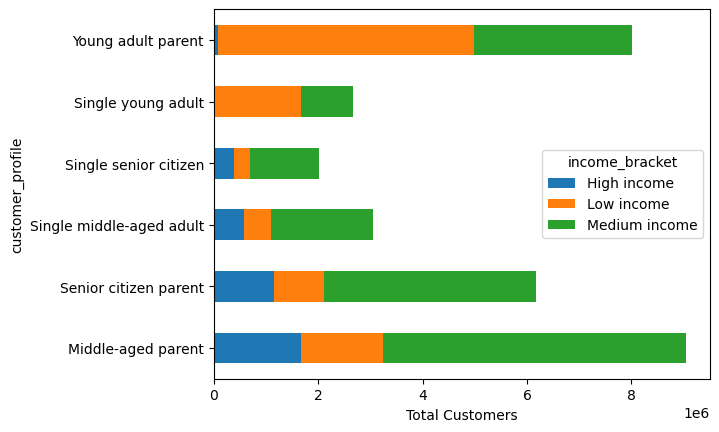

In [64]:
# Create bar chart

plt.figure(figsize = (1,0))
cust_prof = df_exclusion.groupby(['customer_profile', 'income_bracket']).size().unstack().plot.barh(stacked = True).set_xlabel('Total Customers')

In [65]:
# Export graph 

cust_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_prof.png'))

In [66]:
# Group customer profiles by region

df_exclusion.groupby('region')['customer_profile'].value_counts(dropna = False)

region     customer_profile        
Midwest    Middle-aged parent          2137494
           Young adult parent          1867238
           Senior citizen parent       1433965
           Single middle-aged adult     736972
           Single young adult           615763
           Single senior citizen        470081
Northeast  Middle-aged parent          1602659
           Young adult parent          1401576
           Senior citizen parent       1105968
           Single middle-aged adult     505482
           Single young adult           470161
           Single senior citizen        378839
South      Middle-aged parent          2975837
           Young adult parent          2702645
           Senior citizen parent       2050724
           Single middle-aged adult    1018594
           Single young adult           905602
           Single senior citizen        657737
West       Middle-aged parent          2330772
           Young adult parent          2033076
           Senior citize

In [68]:
# Unstack the above data

df_exclusion.groupby(['region','customer_profile']).size().unstack()

customer_profile  Middle-aged parent  Senior citizen parent  \
region                                                        
Midwest                      2137494                1433965   
Northeast                    1602659                1105968   
South                        2975837                2050724   
West                         2330772                1582929   

customer_profile  Single middle-aged adult  Single senior citizen  \
region                                                              
Midwest                             736972                 470081   
Northeast                           505482                 378839   
South                              1018594                 657737   
West                                796100                 515301   

customer_profile  Single young adult  Young adult parent  
region                                                    
Midwest                       615763             1867238  
Northeast                     470161             1401576  
South                         905602             2702645  
West                          669049             2033076

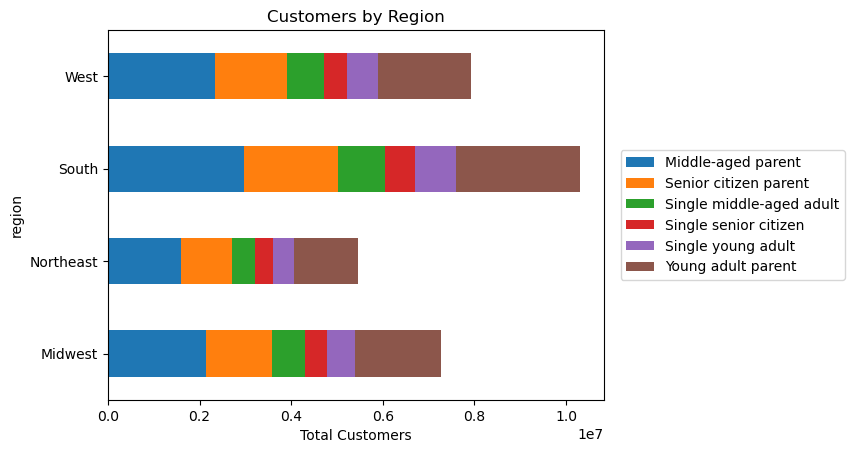

In [69]:
# Create horizontal bar chart for regions

region_bar = df_exclusion.groupby(['region','customer_profile']).size().unstack().plot.barh(stacked = True).set_xlabel('Total Customers')
plt.title('Customers by Region')
plt.legend(loc = 'center right', bbox_to_anchor = (1.50,0.5))
plt.show()

In [70]:
# Export graph

region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [72]:
# Create total spend column

df_exclusion['total_spend'] = df_exclusion.groupby('customer_id')['prices'].transform('sum')

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_29374/2578897282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion['total_spend'] = df_exclusion.groupby('customer_id')['prices'].transform('sum')


In [73]:
# Check new column

df_exclusion.groupby('customer_profile')['total_spend'].value_counts()

customer_profile    total_spend
Middle-aged parent  12058.30       2973
                    21509.20       2888
                    10930.60       2765
                    18830.20       2735
                    20122.60       2724
                                   ... 
Young adult parent  37.10             5
                    38.10             5
                    41.20             5
                    42.00             5
                    25.40             5
Name: count, Length: 101826, dtype: int64

In [74]:
# Aggregate total spend and number of orders based on loyalty status

df_exclusion.groupby('loyalty_flag').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                 order_number        
                        mean    min      max         mean min max
loyalty_flag                                                     
Loyal customer       6153.84 156.00 26394.90        32.64   1  99
New customer          785.45   5.00  3920.40         4.27   1  10
Regular customer     2443.03  15.70 12186.60        12.35   1  40

In [75]:
# Aggregate total spend and number of orders based on customer profile

df_exclusion.groupby('customer_profile').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                order_number        
                                mean   min      max         mean min max
customer_profile                                                        
Middle-aged parent           3377.52 10.40 21509.20        17.71   1  99
Senior citizen parent        3398.25  6.80 26394.90        17.77   1  99
Single middle-aged adult     3511.08  5.00 24307.10        18.21   1  99
Single senior citizen        3366.57 15.70 17519.60        17.84   1  99
Single young adult           3379.44 10.50 18883.20        17.76   1  99
Young adult parent           3470.51  7.00 22696.90        17.90   1  99

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [76]:
# Group and transform loyalty flag and dept id to create chart

loyalty = df_exclusion.groupby(['loyalty_flag', 'department_id']).size().unstack()

Text(120.72222222222221, 0.5, 'Loyalty Status')

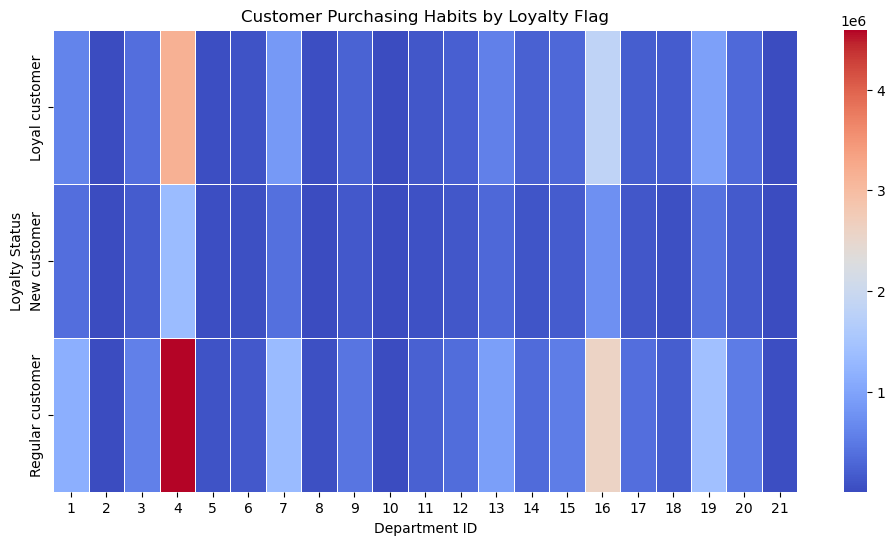

In [77]:
# Create heatmap for purchasing habits of customers based on loyalty flag and department id

habits = plt.figure(figsize = (12,6))
plt.title('Customer Purchasing Habits by Loyalty Flag')
sns.heatmap(loyalty, cmap = 'coolwarm', linewidth = .5)
plt.xlabel('Department ID')
plt.ylabel('Loyalty Status')

In [78]:
# Export map

habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'habits_heatmap.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Number of Customers')

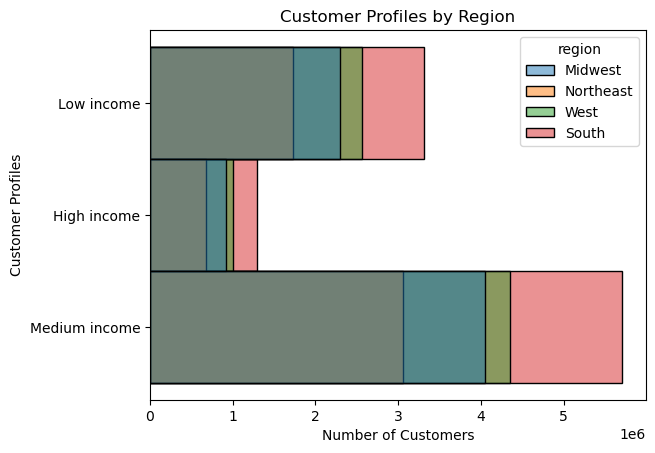

In [80]:
# Create histogram for customer profiles by region

sns.histplot(data = df_exclusion, y = 'income_bracket', hue = 'region')
plt.title('Customer Profiles by Region')
plt.ylabel('Customer Profiles')
plt.xlabel('Number of Customers')

In [81]:
# Export graph

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_hist.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Count')

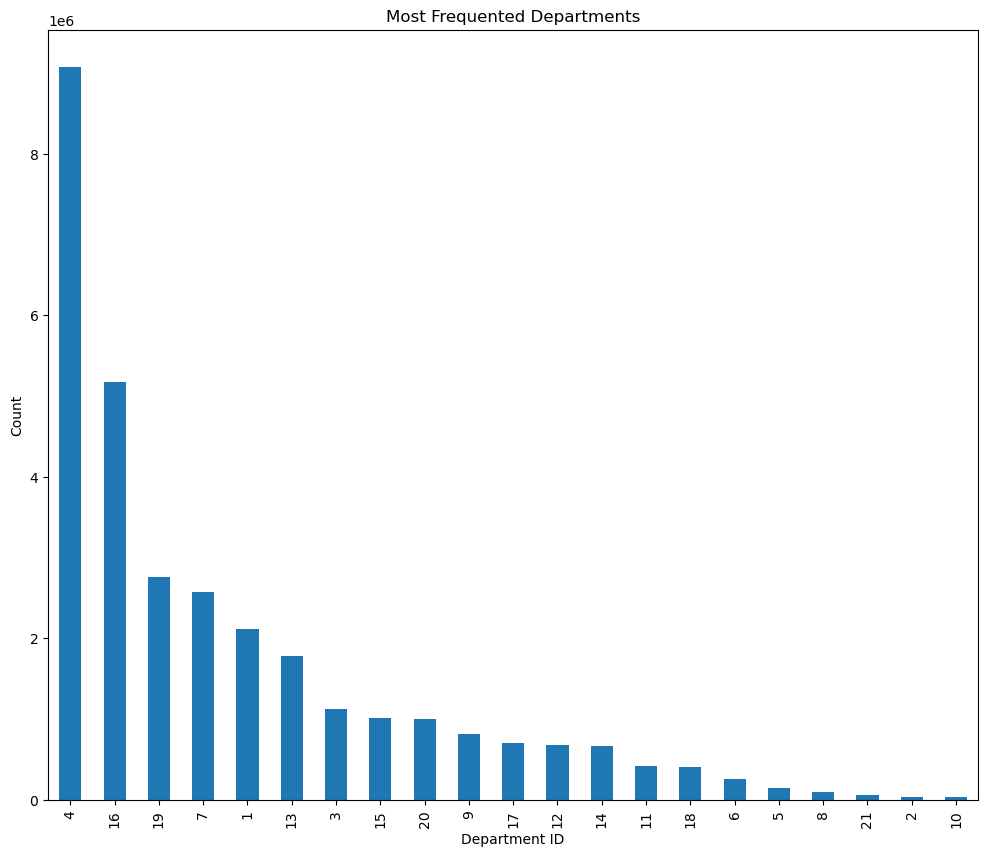

In [84]:
# Create chart for dept id

plt.figure(figsize = (12,10))
dept_id_bar = df_exclusion['department_id'].value_counts().plot.bar()
plt.title('Most Frequented Departments')
plt.xlabel('Department ID')
plt.ylabel('Count')

In [85]:
# Export graph

dept_id_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_id_bar.png'))

In [87]:
df_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final.pkl'))

OSError: [Errno 28] No space left on device